# Pneumonia Prediction 
[//]: # "Made by GreeDoT"

## Index

* [Import Libraries](#Library)
* [Constant Variables](#Param)
* [Read the Data](#Data)
* [Data Visualization](#Visual)
* [CNN Model](#Model)
* [Model Training](#Train)
* [Visualizing Model Perfomance](#Modelperf)
* [Results](#Result)

## Import Libraries <a name="Library"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os, os.path

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img

from sklearn.metrics import classification_report, confusion_matrix

## Constant Variables <a name="Param"></a>

In [35]:
DIMENSION = 180
EPOCHS = 20
BATCH_SIZE = 16
FEATURE_MAPS = 32
CHANNELS = 1
MODE = 'grayscale'

## Read the Data <a name="Data"></a>

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory('./Data/train',
                                              target_size = (DIMENSION,
                                                             DIMENSION),
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'binary',
                                              color_mode = MODE)

val_set = test_datagen.flow_from_directory('./Data/val',
                                          target_size = (DIMENSION,
                                                         DIMENSION),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'binary',
                                          color_mode = MODE)

test_set = test_datagen.flow_from_directory('./Data/test',
                                            target_size = (DIMENSION, 
                                                           DIMENSION),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary',
                                            color_mode = MODE)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
COUNT_NORMAL = len([file for file in os.listdir("./Data/train/NORMAL") ])
print("NORMAl images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([file for file in os.listdir("./Data/train/PNEUMONIA") ])
print("PNEUMONIA images count in training set: " + str(COUNT_PNEUMONIA))

NORMAl images count in training set: 1341
PNEUMONIA images count in training set: 3875


Correcting Imbalance Data between Normal images and Pneumonia Images 

In [7]:
initial_bias = np.log([COUNT_PNEUMONIA/COUNT_NORMAL])
initial_bias

array([1.06113006])

In [8]:
weight_NORMAL = (1 / COUNT_NORMAL)*(COUNT_NORMAL+COUNT_PNEUMONIA)/2.0 
weight_PNEUMONIA = (1 / COUNT_PNEUMONIA)*(COUNT_NORMAL+COUNT_PNEUMONIA)/2.0

class_weight = {0: weight_NORMAL, 1: weight_PNEUMONIA}

print('Weight for NORMAL: {:.2f}'.format(weight_NORMAL))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_PNEUMONIA))

Weight for NORMAL: 1.94
Weight for PNEUMONIA: 0.67


## Data Visualization <a name="Visual"></a>

normal picture title:  IM-0650-0001-0002.jpeg
pneumonia picture title: person84_virus_157.jpeg


Text(0.5, 1.0, 'Pneumonia')

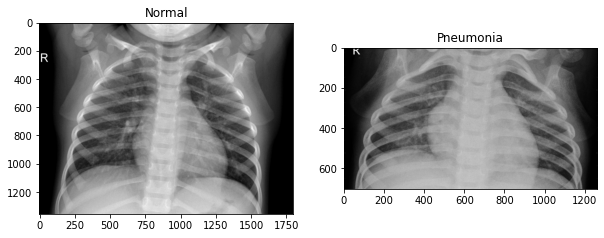

In [9]:
# Normal 
rand_normal= np.random.randint(0,len(os.listdir("./Data/train/NORMAL")))
normal_pic = os.listdir("./Data/train/NORMAL")[rand_normal]
normal_address = "./Data/train/NORMAL/" + normal_pic
print('normal picture title: ',normal_pic)

# Pneumonia
rand_pneumonia = np.random.randint(0,len(os.listdir("./Data/train/PNEUMONIA")))
pneumonia_pic =  os.listdir("./Data/train/PNEUMONIA")[rand_pneumonia]
pneumonia_address = "./Data/train/PNEUMONIA/" + pneumonia_pic
print('pneumonia picture title:',pneumonia_pic)

# Load the images
normal_load = Image.open(normal_address)
pneumonia_load = Image.open(pneumonia_address)

# Plot the images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(normal_load,cmap = 'gray')
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_load,cmap = 'gray')
a2.set_title('Pneumonia')

## CNN Model <a name="Model"></a>

In [33]:
cnn = Sequential()
#1st Convolution
cnn.add(Conv2D(FEATURE_MAPS, (3, 3),
               input_shape = (DIMENSION,
                              DIMENSION,
                              CHANNELS),
               activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(FEATURE_MAPS, (3, 3),
               input_shape = (DIMENSION,
                              DIMENSION,
                              CHANNELS),
               activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(units = FEATURE_MAPS * 2, activation = 'relu'))
cnn.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the Neural network
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

## Model Training <a name="Train"></a>

In [36]:
results = cnn.fit(train_set,
                  steps_per_epoch = len(train_set),
                  epochs = EPOCHS,
                  validation_data = val_set,
                  validation_steps = len(val_set),
                  class_weight = class_weight)

Epoch 1/20
326/326 [==============================] - 124s 380ms/step - loss: 0.0784 - accuracy: 0.9693 - val_loss: 0.1611 - val_accuracy: 0.9375
Epoch 2/20
326/326 [==============================] - 123s 377ms/step - loss: 0.0755 - accuracy: 0.9714 - val_loss: 0.0919 - val_accuracy: 0.9375
Epoch 3/20
326/326 [==============================] - 124s 380ms/step - loss: 0.0751 - accuracy: 0.9674 - val_loss: 0.1017 - val_accuracy: 1.0000
Epoch 4/20
326/326 [==============================] - 125s 384ms/step - loss: 0.0725 - accuracy: 0.9718 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 5/20
326/326 [==============================] - 124s 379ms/step - loss: 0.0722 - accuracy: 0.9705 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 6/20
326/326 [==============================] - 123s 379ms/step - loss: 0.0707 - accuracy: 0.9724 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 7/20
326/326 [==============================] - 123s 376ms/step - loss: 0.0691 - accuracy: 0.9732 - val_loss: 0.1106 -

In [37]:
results.history

{'loss': [0.07835596054792404,
  0.07548153400421143,
  0.0751229003071785,
  0.07247288525104523,
  0.07217691838741302,
  0.07067172229290009,
  0.06907148659229279,
  0.06444624811410904,
  0.06154858320951462,
  0.07285947352647781,
  0.05547962710261345,
  0.07051602751016617,
  0.06358867138624191,
  0.057788677513599396,
  0.06225889176130295,
  0.055450569838285446,
  0.05228191241621971,
  0.061786405742168427,
  0.06003318354487419,
  0.051609817892313004],
 'accuracy': [0.9693251252174377,
  0.9714340567588806,
  0.9674080014228821,
  0.9718174934387207,
  0.970475435256958,
  0.9723926186561584,
  0.9731594920158386,
  0.9752684235572815,
  0.9785276055335999,
  0.9702837467193604,
  0.9789110422134399,
  0.9754601120948792,
  0.9748849868774414,
  0.9779524803161621,
  0.9787193536758423,
  0.977569043636322,
  0.9802530407905579,
  0.9773772954940796,
  0.9783359169960022,
  0.9817867875099182],
 'val_loss': [0.16111552715301514,
  0.09186804294586182,
  0.101716928184032

## Visualizing Model Perfomance <a name="Modelperf"></a>

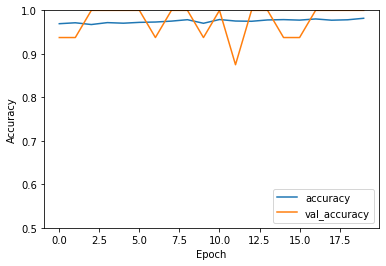

In [38]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Results <a name="Result"></a>

In [41]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory('./Data/test',
                                        target_size = (DIMENSION,
                                                       DIMENSION),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = MODE,
                                        shuffle=False)

predictions = cnn.predict(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


In [42]:
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,204,30
Actual Pneumonia,17,373


In [43]:
cnn.save('pneum.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Data\assets
